### Import Packages 

In [2]:
import os
import math
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import FunctionTransformer, StandardScaler, PowerTransformer

from tqdm.notebook import tqdm

### Basic Notebook seetings and Package Config

In [3]:
sns.set_theme(style="darkgrid")
sns.set(style='darkgrid', context='talk', palette='rainbow')
pd.set_option("display.max_colwidth", 1000)
random.seed(100)
tqdm.pandas()

### Adding SRC directory to sys path 

In [4]:
parent_directory = os.path.abspath(
    ".."
)  # Should Point to root directory /Project Directory
os.chdir(parent_directory)

print(f"parent directory {parent_directory}")

datset_dir = os.path.join(parent_directory, "data")

if os.path.isdir(datset_dir) is False:
    raise NotADirectoryError(f"Directory {datset_dir} not valid")

test_dataset_path = os.path.join(datset_dir, "test_data.csv")
train_dataset_path = os.path.join(datset_dir, "test_data.csv")


if os.path.isfile(test_dataset_path) is False:
    raise NotADirectoryError(f"test dataset_path {test_dataset_path} not valid")
else:
    print(f"test datset_path {test_dataset_path}")

if os.path.isfile(train_dataset_path) is False:
    raise NotADirectoryError(f"train dataset_path {train_dataset_path} not valid")
else:
    print(f"train datset_path {train_dataset_path}")

parent directory D:\codespace\python\Zomato-Restaurant-Review
test datset_path D:\codespace\python\Zomato-Restaurant-Review\data\test_data.csv
train datset_path D:\codespace\python\Zomato-Restaurant-Review\data\test_data.csv


### Dataset Loading

In [5]:
dataframe = pd.read_csv(os.path.join(datset_dir, "zomato.csv"), encoding="ISO-8859-1")

print(f"dataset {dataframe.shape}")
dataframe.head()

dataset (9551, 21)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Makati City",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Makati City",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


#### Duplicate Checking & Removing

In [6]:
dataframe.duplicated().sum()
# dataframe.drop_duplicate(keep='first',inplace=True)
# print(dataframe.duplicated().sum())

0

#### Null Value Checking 

In [7]:
dataframe.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [8]:
print(dataframe.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [10]:
dataframe.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## EDA , Visulization of Dtaset Columns and Finding Relationship with Target columns

#### Target Variable Analysis [ Aggregate rating]

In [11]:
dataframe["Aggregate rating"].nunique()

rating_count = dataframe["Aggregate rating"].nunique()

print(f"rating count {rating_count}")

print(dataframe["Aggregate rating"].unique())

rating count 33
[4.8 4.5 4.4 4.9 4.  4.2 4.3 3.6 4.7 3.  3.8 3.7 3.2 3.1 0.  4.1 3.3 4.6
 3.9 3.4 3.5 2.2 2.9 2.4 2.6 2.8 2.1 2.7 2.5 1.8 2.  2.3 1.9]


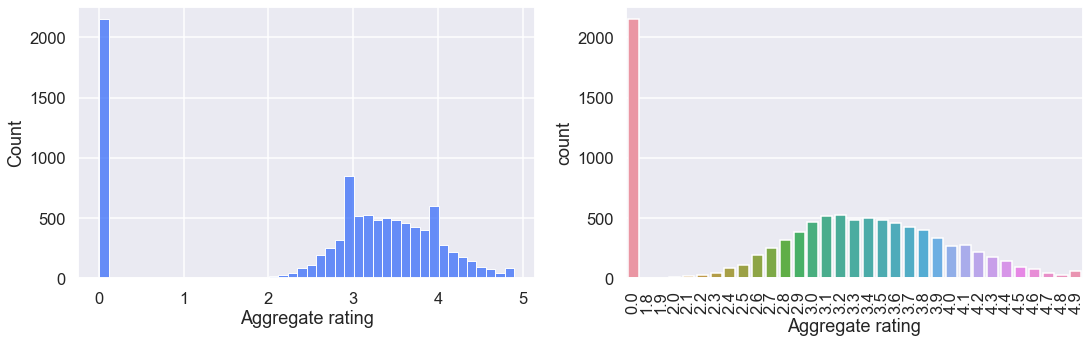

In [12]:
fig, (axs1, axs2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

sns.histplot(x="Aggregate rating", data=dataframe, ax=axs1)

sns.countplot(x="Aggregate rating", data=dataframe, ax=axs2)

axs2.tick_params(axis="x", rotation=90)

plt.show()

#### Analyzing Country Code

In [14]:
country_code_count = dataframe["Country Code"].nunique()
print(f"Unique Country Code {country_code_count}")

print(dataframe["Country Code"].unique())

Unique Country Code 15
[162  30 216  14  37 184 214   1  94 148 215 166 189 191 208]


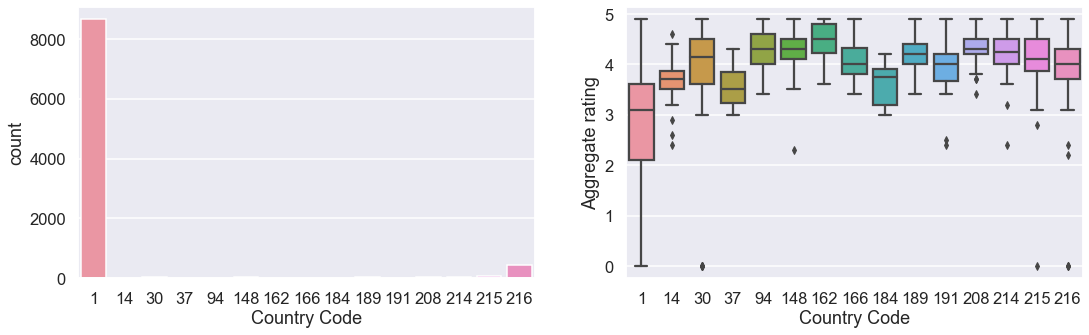

In [15]:
fig, (axs1, axs2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

sns.countplot(x="Country Code", data=dataframe, ax=axs1)

sns.boxplot(y="Aggregate rating", x="Country Code", data=dataframe, ax=axs2)

plt.show()

#### Analyzing Country City

In [16]:
city_count = dataframe["City"].nunique()
print(f"Unique City {city_count}")

print(dataframe["City"].unique())

Unique City 141
['Makati City' 'Mandaluyong City' 'Pasay City' 'Pasig City' 'Quezon City'
 'San Juan City' 'Santa Rosa' 'Tagaytay City' 'Taguig City' 'Brasí_lia'
 'Rio de Janeiro' 'Sí£o Paulo' 'Albany' 'Armidale' 'Athens' 'Augusta'
 'Balingup' 'Beechworth' 'Boise' 'Cedar Rapids/Iowa City' 'Chatham-Kent'
 'Clatskanie' 'Cochrane' 'Columbus' 'Consort' 'Dalton' 'Davenport'
 'Des Moines' 'Dicky Beach' 'Dubuque' 'East Ballina' 'Fernley' 'Flaxton'
 'Forrest' 'Gainesville' 'Hepburn Springs' 'Huskisson' 'Inverloch'
 'Lakes Entrance' 'Lakeview' 'Lincoln' 'Lorn' 'Macedon' 'Macon' 'Mayfield'
 'Mc Millan' 'Middleton Beach' 'Miller' 'Monroe' 'Montville'
 'Ojo Caliente' 'Orlando' 'Palm Cove' 'Paynesville' 'Penola' 'Pensacola'
 'Phillip Island' 'Pocatello' 'Potrero' 'Princeton' 'Rest of Hawaii'
 'Savannah' 'Singapore' 'Sioux City' 'Tampa Bay' 'Tanunda' 'Trentham East'
 'Valdosta' 'Vernonia' 'Victor Harbor' 'Vineland Station' 'Waterloo'
 'Weirton' 'Winchester Bay' 'Yorkton' 'Abu Dhabi' 'Dubai' 'Sharjah

In [17]:
dataframe = dataframe[dataframe["Country Code"] == 1].copy()
print(f"dataset {dataframe.shape}")

city_count = dataframe["City"].nunique()
print(f"Unique City {city_count}")

print(dataframe["City"].unique())

dataset (8652, 21)
Unique City 43
['Agra' 'Ahmedabad' 'Allahabad' 'Amritsar' 'Aurangabad' 'Bangalore'
 'Bhopal' 'Bhubaneshwar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Dehradun'
 'Faridabad' 'Ghaziabad' 'Goa' 'Gurgaon' 'Guwahati' 'Hyderabad' 'Indore'
 'Jaipur' 'Kanpur' 'Kochi' 'Kolkata' 'Lucknow' 'Ludhiana' 'Mangalore'
 'Mohali' 'Mumbai' 'Mysore' 'Nagpur' 'Nashik' 'New Delhi' 'Noida'
 'Panchkula' 'Patna' 'Puducherry' 'Pune' 'Ranchi' 'Secunderabad' 'Surat'
 'Vadodara' 'Varanasi' 'Vizag']


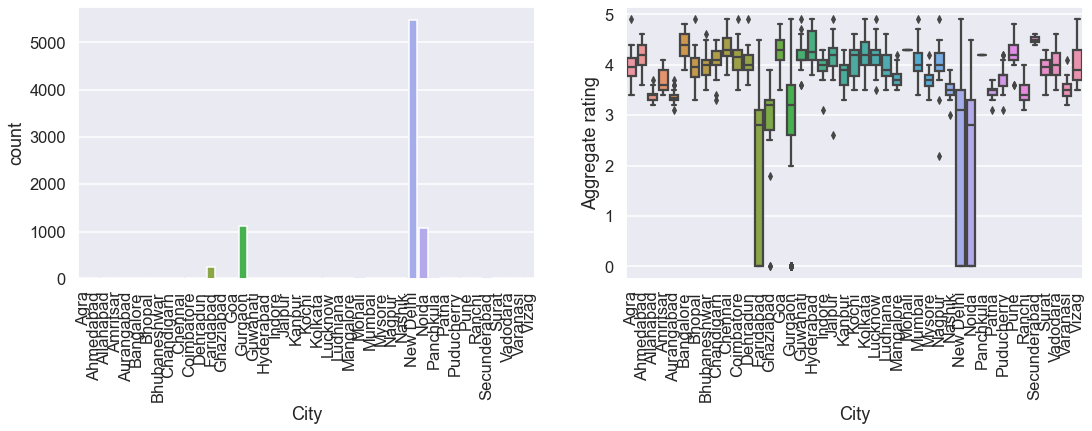

In [18]:
fig, (axs1, axs2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

sns.countplot(x="City", data=dataframe, ax=axs1)

axs1.tick_params(axis="x", rotation=90)

sns.boxplot(y="Aggregate rating", x="City", data=dataframe, ax=axs2)

axs2.tick_params(axis="x", rotation=90)

plt.show()

#### Analyzing Longitude and Latitude

In [19]:
dataframe["Longitude"].describe()

count    8652.000000
mean       72.856786
std        18.017536
min         0.000000
25%        77.098797
50%        77.203468
75%        77.285356
max        91.806493
Name: Longitude, dtype: float64

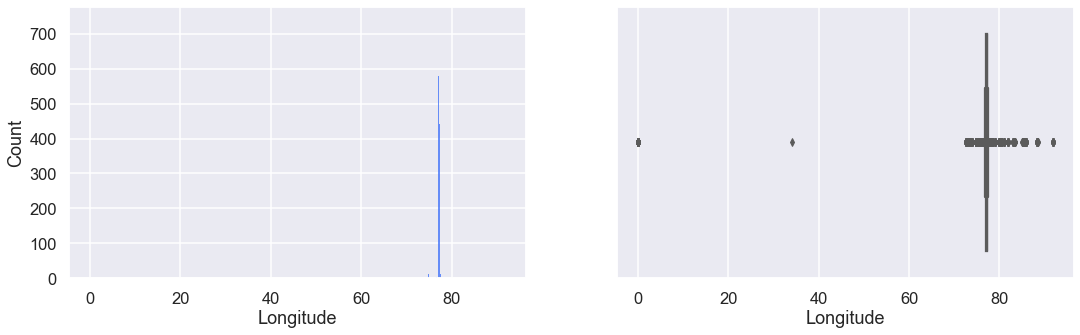

In [20]:
fig, (axs1, axs2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

sns.histplot(x="Longitude", data=dataframe, ax=axs1)

sns.boxplot(x="Longitude", data=dataframe, ax=axs2)

plt.show()

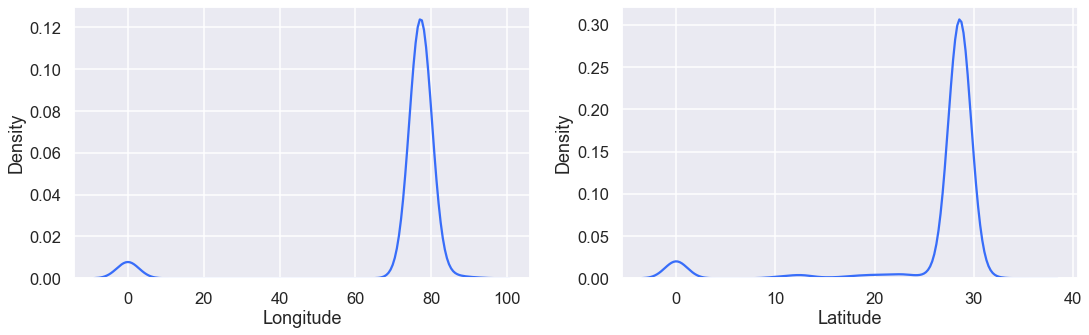

In [21]:
fig, (axs1, axs2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

sns.kdeplot(x="Longitude", data=dataframe, ax=axs1)

sns.kdeplot(x="Latitude", data=dataframe, ax=axs2)

plt.show()

In [22]:
dataframe["Latitude"].describe()

count    8652.000000
mean       26.420652
std         6.976576
min         0.000000
25%        28.491425
50%        28.569869
75%        28.637857
max        35.000000
Name: Latitude, dtype: float64

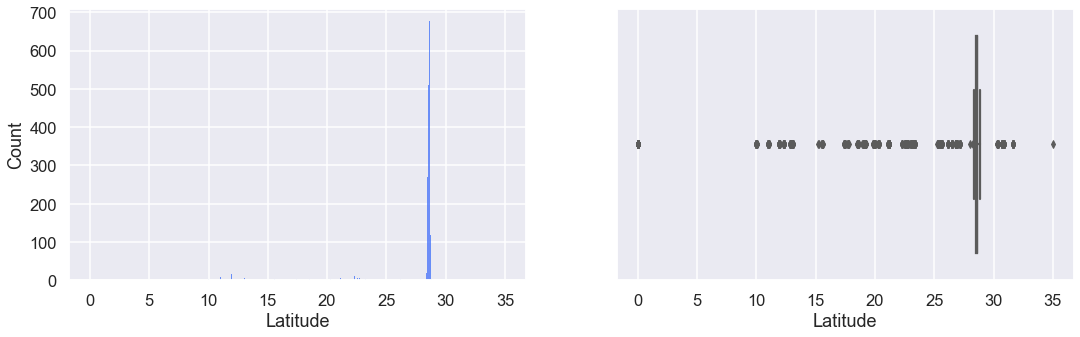

In [23]:
fig, (axs1, axs2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

sns.histplot(x="Latitude", data=dataframe, ax=axs1)

sns.boxplot(x="Latitude", data=dataframe, ax=axs2)

plt.show()

#### Analyzing Average Cost for two

In [24]:
dataframe["Average Cost for two"].describe()

count    8652.000000
mean      623.370319
std       595.676124
min         0.000000
25%       300.000000
50%       450.000000
75%       700.000000
max      8000.000000
Name: Average Cost for two, dtype: float64

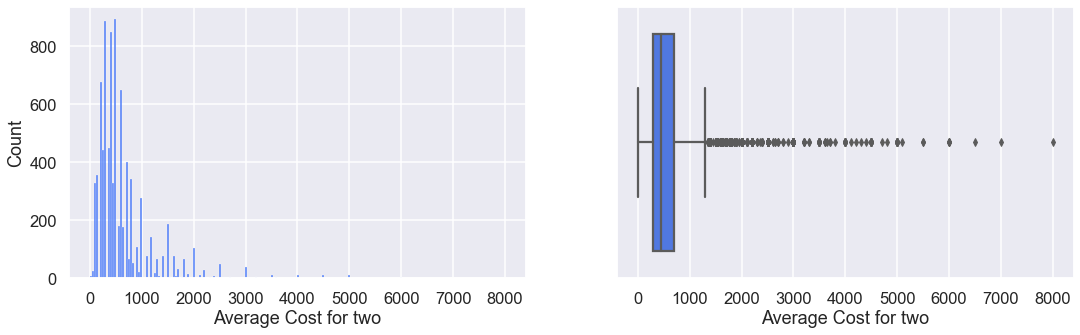

In [25]:
fig, (axs1, axs2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

sns.histplot(x="Average Cost for two", data=dataframe, ax=axs1)

sns.boxplot(x="Average Cost for two", data=dataframe, ax=axs2)

plt.show()

In [26]:
dataframe["Average Cost for two"].to_numpy()

array([ 850,  700,  500, ...,  600, 1500, 1400], dtype=int64)

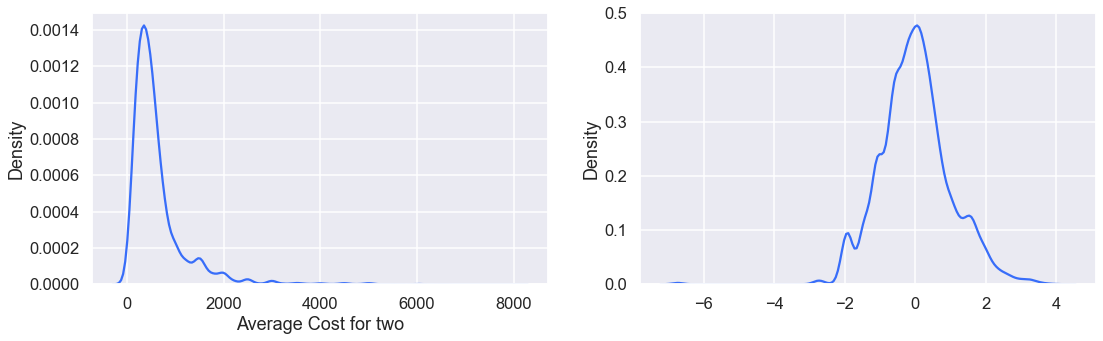

In [27]:
fig, (axs1, axs2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

sns.kdeplot(x="Average Cost for two", data=dataframe, ax=axs1)

pt = PowerTransformer(method="yeo-johnson")

pt_trf = pt.fit_transform(dataframe[["Average Cost for two"]].values)

sns.kdeplot(x=pt_trf.flatten(), ax=axs2)

plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_14952\1828287014.py:11: RuntimeWarning: invalid value encountered in log
  log_rf = np.log(std_cost.flatten())


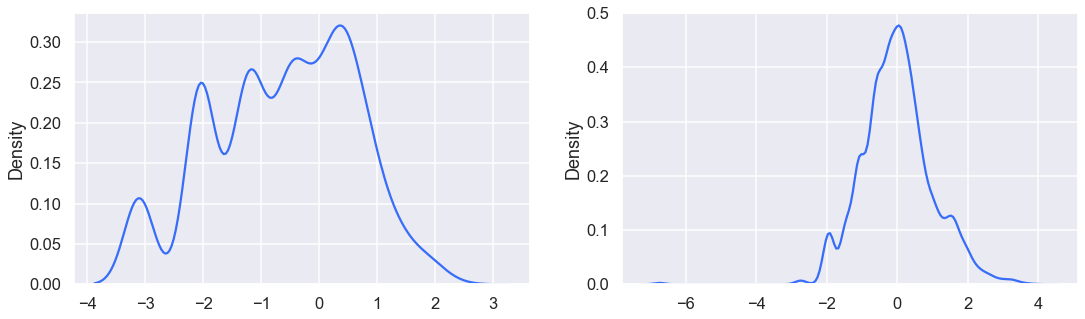

In [28]:
fig, (axs1, axs2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

pt = PowerTransformer(method="yeo-johnson")

sc = StandardScaler()

# sc.fit(dataframe['Average Cost for two'])

std_cost = sc.fit_transform(dataframe[["Average Cost for two"]].values)

log_rf = np.log(std_cost.flatten())

sns.kdeplot(x=log_rf, ax=axs1)


pt_trf = pt.fit_transform(dataframe[["Average Cost for two"]].values)


sns.kdeplot(x=pt_trf.flatten(), ax=axs2)

plt.show()

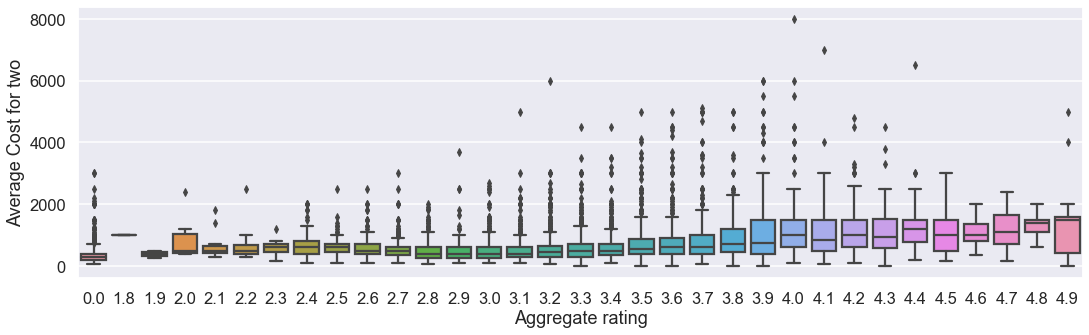

In [29]:
fig, axs3 = plt.subplots(figsize=(18, 5))

sns.boxplot(x="Aggregate rating", y="Average Cost for two", data=dataframe, ax=axs3)

plt.show()

#### Analyzing Price range

In [30]:
dataframe["Price range"].describe()

count    8652.000000
mean        1.721683
std         0.852544
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: Price range, dtype: float64

In [31]:
dataframe["Price range"].unique()

array([3, 2, 4, 1], dtype=int64)

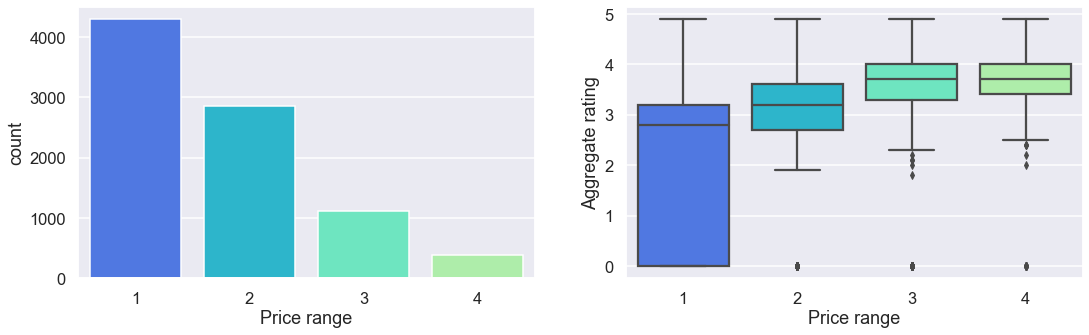

In [32]:
fig, (axs1, axs2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

sns.countplot(x="Price range", data=dataframe, ax=axs1)

sns.boxplot(x="Price range", y="Aggregate rating", data=dataframe, ax=axs2)

plt.show()

####  Analyzing Currency

In [33]:
currency_count = dataframe["Currency"].nunique()

print(f"Unique City {currency_count}")

print(dataframe["Currency"].unique())

Unique City 1
['Indian Rupees(Rs.)']


#### Analyzing Has Table booking 

In [34]:
tble_bking_count = dataframe["Has Table booking"].nunique()

print(f"Unique City {tble_bking_count}")

print(dataframe["Has Table booking"].unique())

Unique City 2
['No' 'Yes']


In [35]:
dataframe.groupby(["Has Table booking"]).agg(
    mean_rating=("Aggregate rating", "mean")
).reset_index().sort_values(by="mean_rating")

,Has Table booking,mean_rating
0,No,2.394165
1,Yes,3.400000


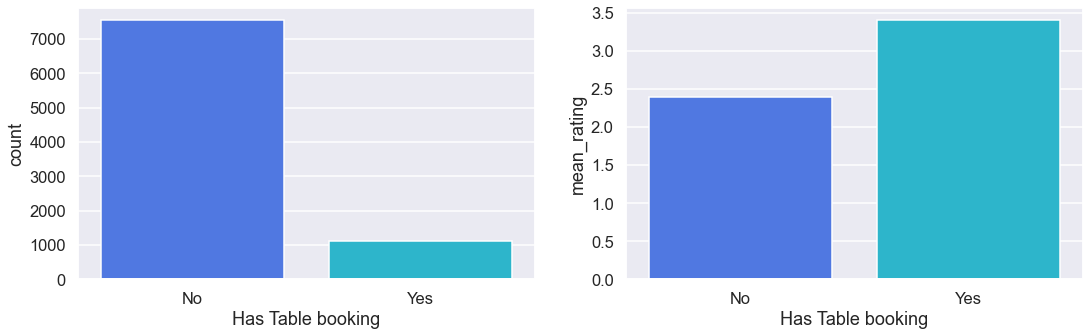

In [36]:
fig, (axs1, axs2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

sns.countplot(x="Has Table booking", data=dataframe, ax=axs1)

sns.barplot(
    x="Has Table booking",
    y="mean_rating",
    data=dataframe.groupby(["Has Table booking"])
    .agg(mean_rating=("Aggregate rating", "mean"))
    .reset_index(),
    ax=axs2,
)

plt.show()

#### Analyzing Has Online delivery

In [37]:
online_bokibg_count = dataframe["Has Online delivery"].nunique()

print(f"Unique City {online_bokibg_count}")

print(dataframe["Has Online delivery"].unique())

Unique City 2
['No' 'Yes']


In [38]:
dataframe.groupby(["Has Online delivery"]).agg(
    mean_rating=("Aggregate rating", "mean")
).reset_index().sort_values(by="mean_rating")

,Has Online delivery,mean_rating
0,No,2.244999
1,Yes,3.238836


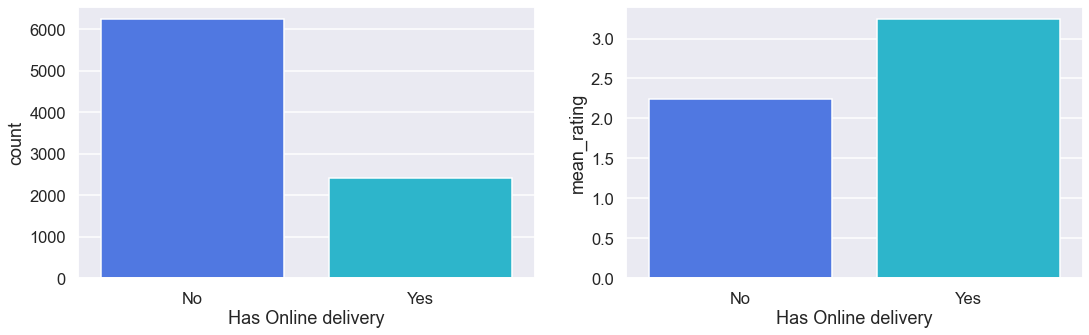

In [39]:
fig, (axs1, axs2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

sns.countplot(x="Has Online delivery", data=dataframe, ax=axs1)

sns.barplot(
    x="Has Online delivery",
    y="mean_rating",
    data=dataframe.groupby(["Has Online delivery"])
    .agg(mean_rating=("Aggregate rating", "mean"))
    .reset_index(),
    ax=axs2,
)

plt.show()

#### Analyzing Votes

In [40]:
dataframe["Votes"].describe()

count     8652.000000
mean       137.212552
std        428.039513
min          0.000000
25%          4.000000
50%         24.000000
75%        100.000000
max      10934.000000
Name: Votes, dtype: float64

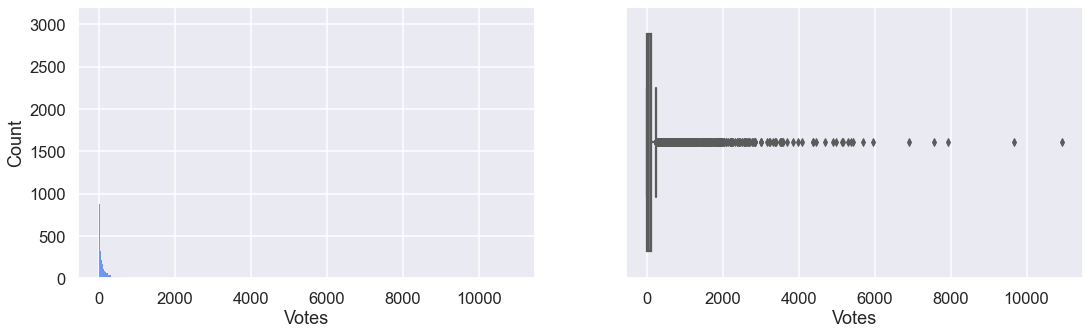

In [41]:
fig, (axs1, axs2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

sns.histplot(x="Votes", data=dataframe, ax=axs1)

sns.boxplot(x="Votes", data=dataframe, ax=axs2)

plt.show()

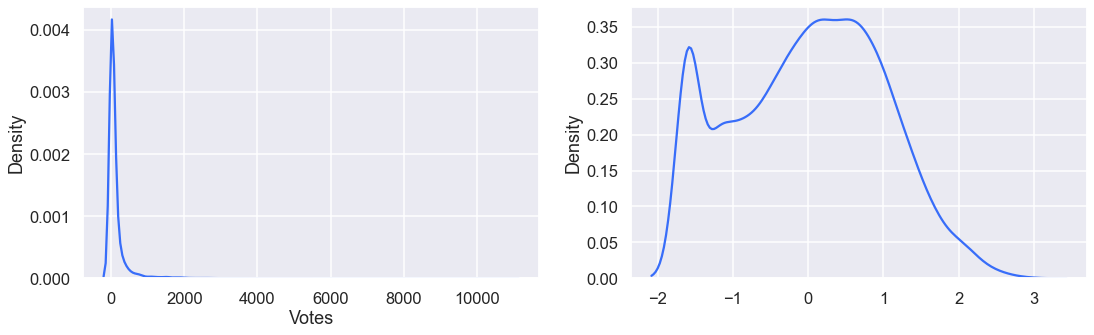

In [42]:
fig, (axs1, axs2) = plt.subplots(nrows=1, ncols=2, figsize=(18, 5))

sns.kdeplot(x="Votes", data=dataframe, ax=axs1)

pt1 = PowerTransformer(method="yeo-johnson", standardize=True)

pt_trf1 = pt1.fit_transform(dataframe[["Votes"]].values)

sns.kdeplot(x=pt_trf1.flatten(), ax=axs2)

plt.show()

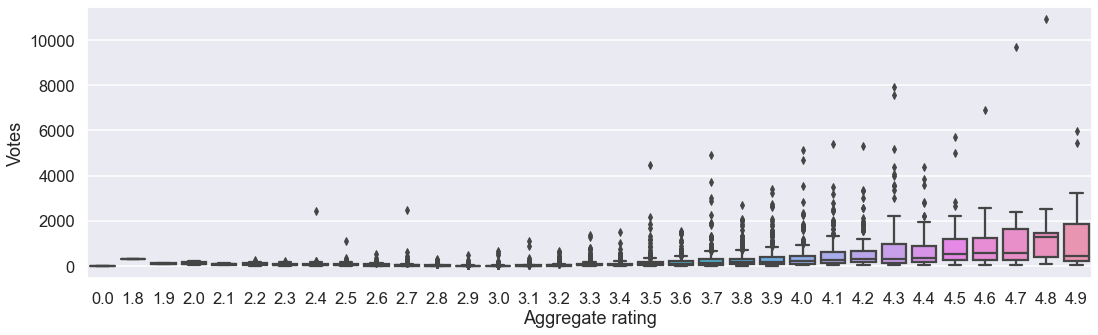

In [43]:
fig, axs3 = plt.subplots(figsize=(18, 5))

sns.boxplot(x="Aggregate rating", y="Votes", data=dataframe, ax=axs3)

plt.show()